In [22]:
# Red Wine Quality Prediction using ML



In [4]:
# 기본 패키지
import numpy as np                  # linear algebra
import pandas as pd                 # data processing, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

# 전처리 및 모델링 준비를 위한 패키지
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# 실제 모델링을 위한 패키지

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# 모델 평가를 위한 패키지
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn import metrics



### Data load & EDA

In [5]:
# loading data set to a Pandas DataFrame
data = pd.read_csv('winequality-red.csv')

In [6]:
# number of rows & columns in the dataset 
data.shape

(1599, 12)

In [7]:
# glancing at the data set
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
# checking datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
# checking for missing values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# descriptive statistics of the dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Visualization

Text(0.5, 1.0, 'number of values for each quality')

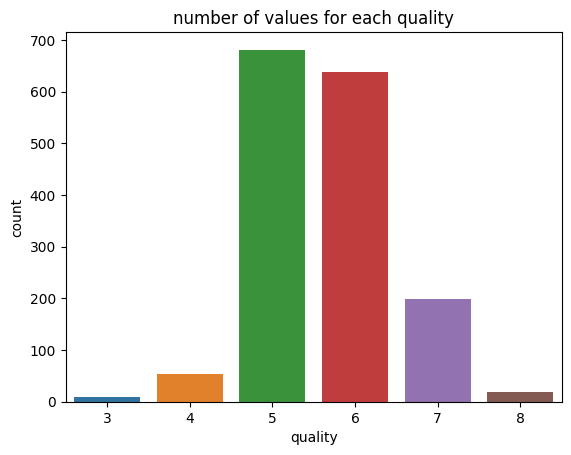

In [11]:
# number of values for each quality 
sns.countplot(data, x="quality")
plt.title("number of values for each quality")

Text(0.5, 1.0, 'vlatile acidity vs. quality')

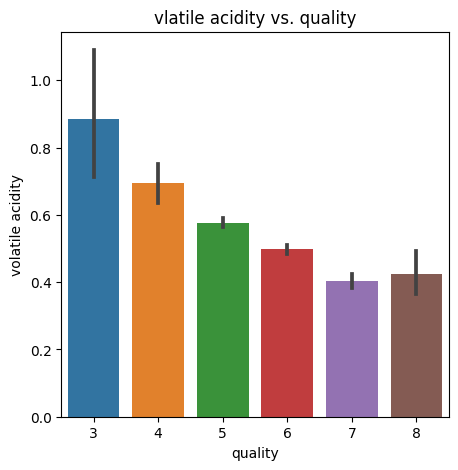

In [12]:
# volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data = data)
plt.title("vlatile acidity vs. quality")

Text(0.5, 1.0, 'citric acid vs. quality')

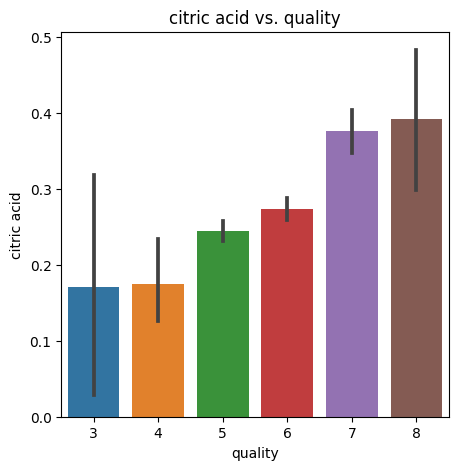

In [13]:
# citric acid vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data = data)
plt.title("citric acid vs. quality")

<Axes: xlabel='quality', ylabel='alcohol'>

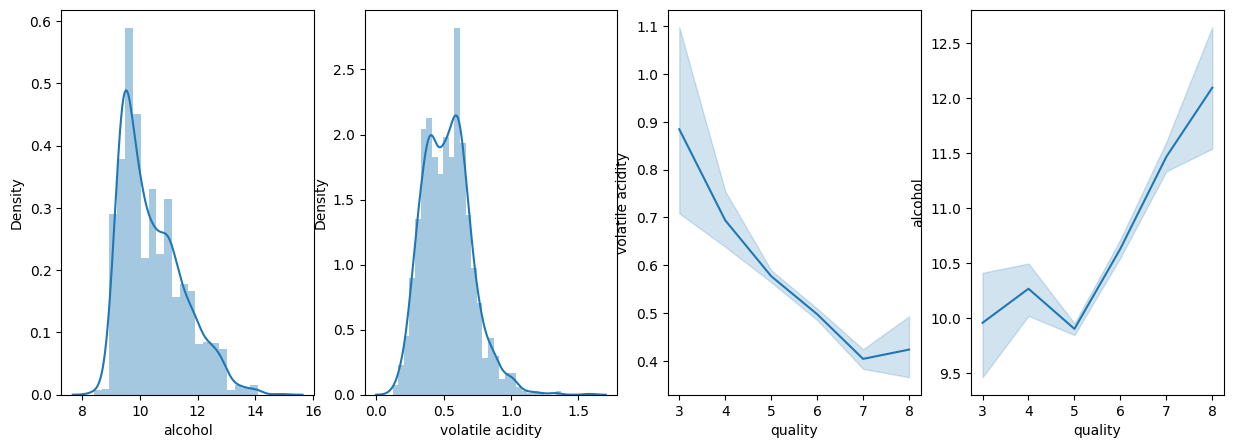

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(15,5))

sns.distplot(data['alcohol'], ax = ax[0])
sns.distplot(data['volatile acidity'], ax = ax[1])
sns.lineplot(x=data['quality'],y=data['volatile acidity'], ax = ax[2])
sns.lineplot(x=data['quality'],y=data['alcohol'], ax = ax[3])

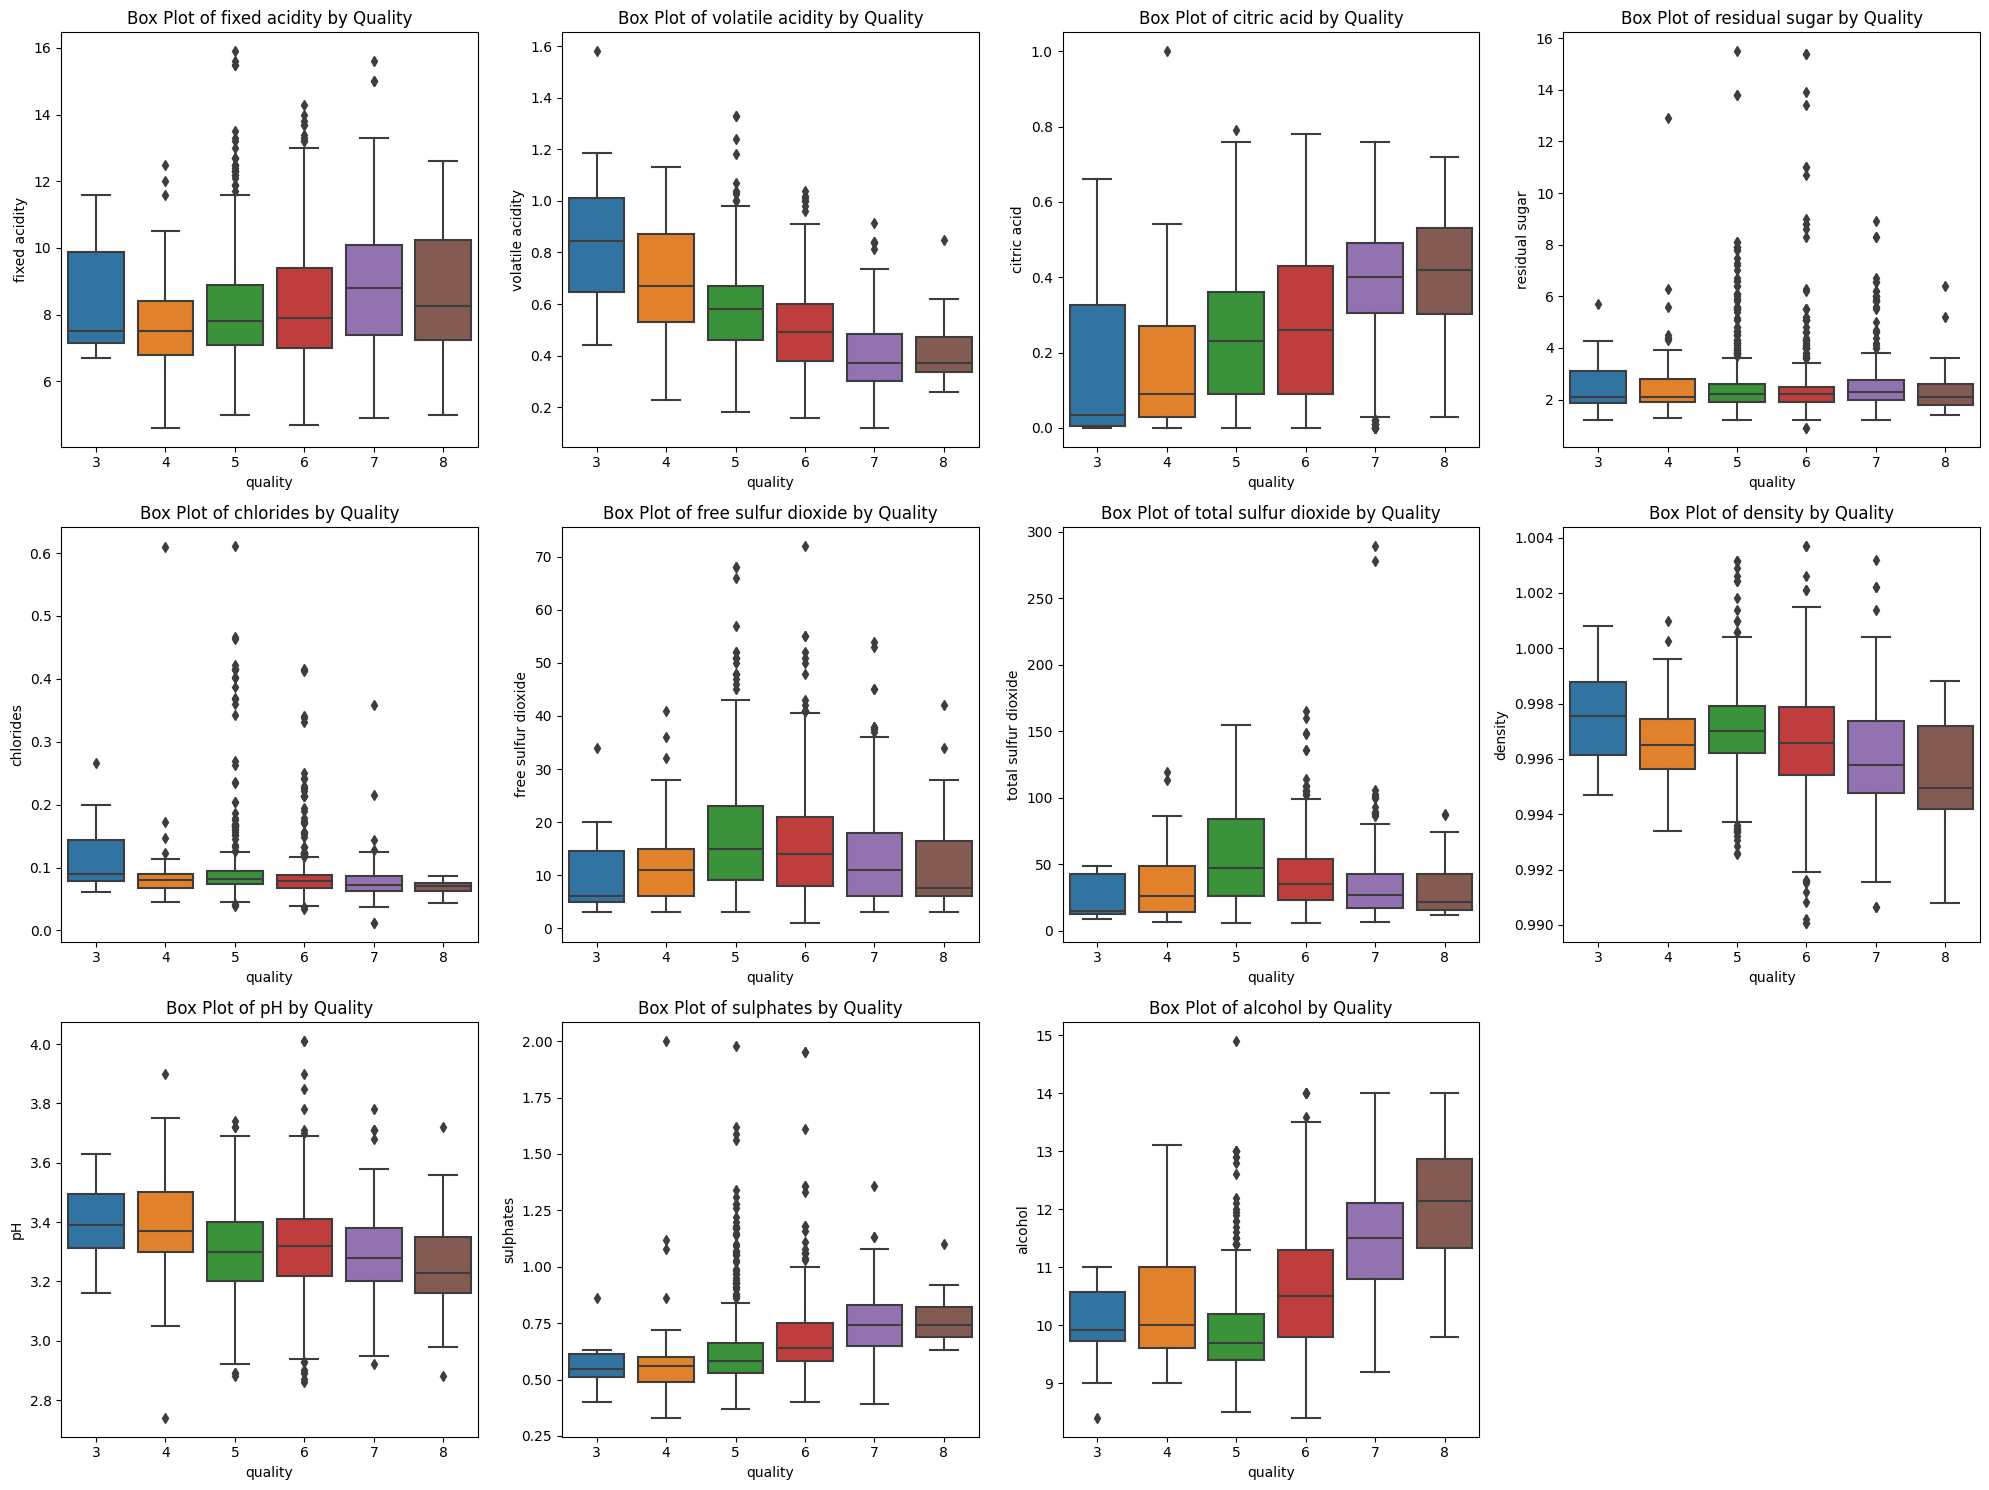

In [17]:
# Create a figure with subplots
plt.figure(figsize=(20,15))

# Loop through each independent variable in the DataFrame
for i, column in enumerate(data.columns[:-1]):  # Exclude the dependent variable
    plt.subplot(3, 4, i +1)   # Create a subplot for each variable
    sns.boxplot(x=data['quality'], y=data[column])  # Create a box plot with target on x-axis and variable on y-axis
    plt.title(f'Box Plot of {column} by Quality')   # Set the title of the plot


plt.tight_layout()   # Adjust the layout
plt.show()

#### Observation 

- to perform some standardization
- As the quality of the wine increase, we observe the median value of alcohol increasing.
- A similar trend is seen for sulphates and citric acid
- There are some features for which the median value of the variable remains unaffected, like residual sugar.
- The median value of the variable reduces with an increase in the quality of wine for variables like volatile acidity, density, and pH.


In [18]:
# Correlation between variables
correlation = data.corr()

In [19]:
data.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

<Axes: >

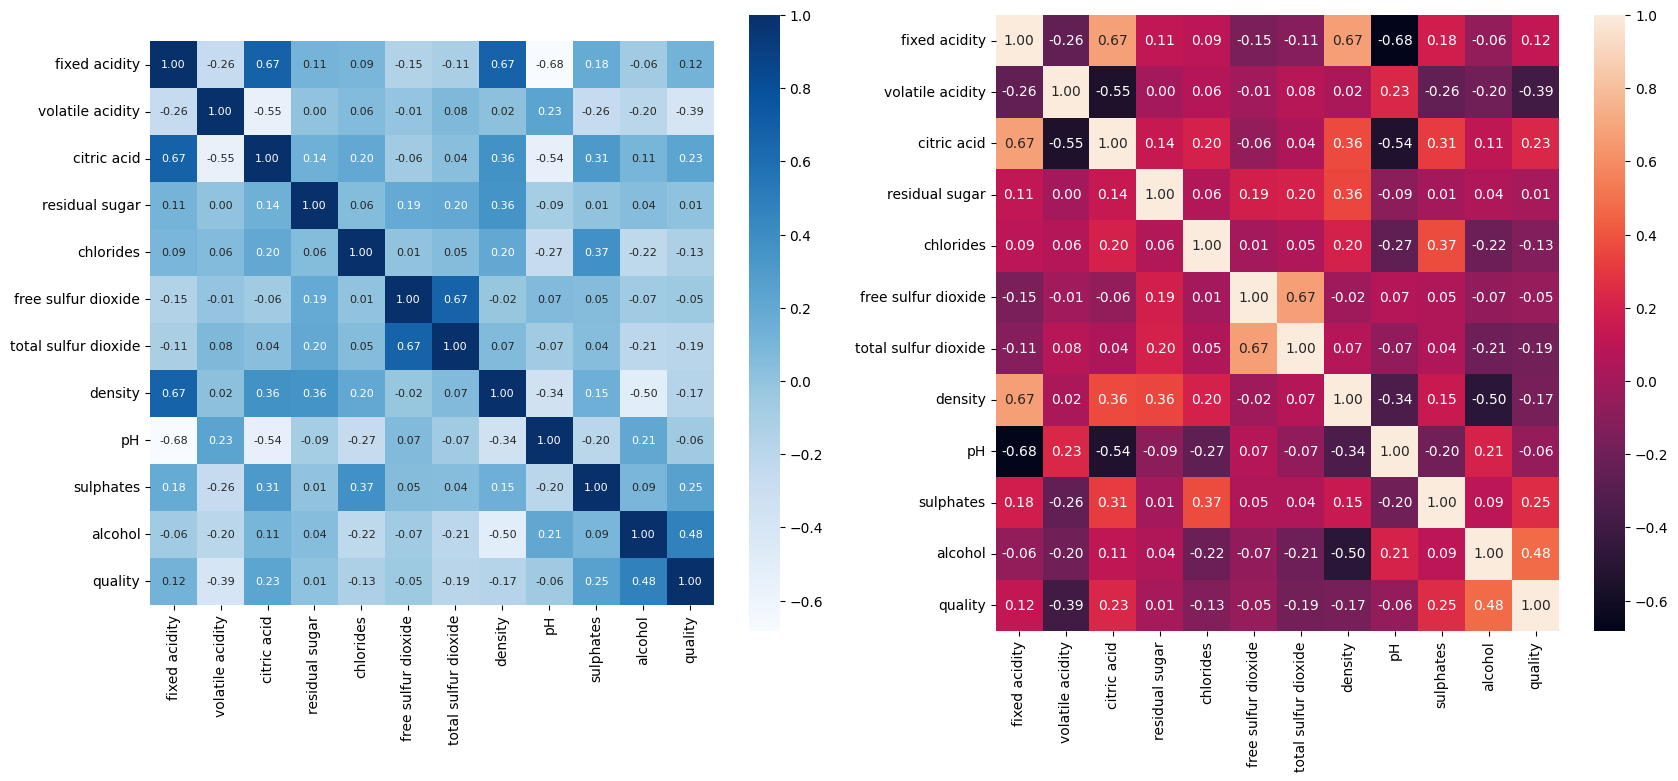

In [23]:
# Deriving a heatmap graph in a different way

fig, ax = plt.subplots(ncols=2, figsize=(20,8))

sns.heatmap(correlation, cbar=True, square=True, fmt = '.2f', annot = True, annot_kws={'size':8}, cmap='Blues', ax =ax[0])
sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax[1])

###### Residual sugar has a very low correlation of 0.01 with quality.
###### Also, in the box plots, we saw that the median value remains the same across different levels of quality, so we may drop this variable.
###### PH also has a very low correlation of 0.6 with quality. we will remove this.
###### Citric acid fixed acidity have a high correlation. To avoid multicollinearity, we will drop citric acid.
###### Density and fixed acidity have a high correlation with each other, so we will drop density. 

### Data Processing

In [24]:
# drop the part of data
data = data.drop(columns = ['residual sugar', 'free sulfur dioxide', 'pH', 'citric acid', 'density'])

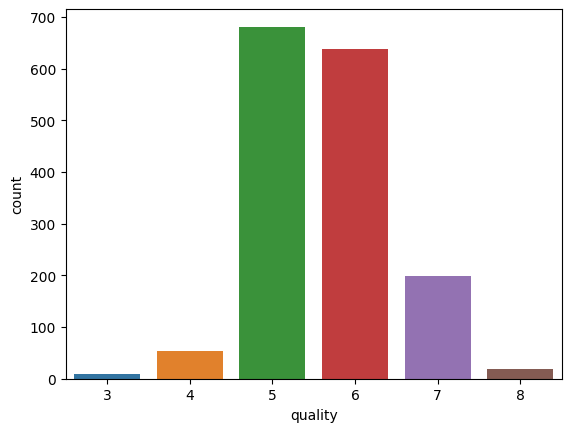

In [25]:
sns.countplot(data, x='quality')
plt.show()
# we observe we can easily create 3classes, Low/Medium/High

In [27]:
## binning quality to <=6, >6 (as provided in the tips section of the kaggles datasets section)

bins = [0, 7, 10]

# Define bin labels (we keep the labels numeric as the model input has to be in numeric data types)
bin_labels = [0, 1]

# Use cut() function to bin the data
data['quality'] = pd.cut(data['quality'], bins=bins, labels=bin_labels, right=False)

In [29]:
data['quality'].value_counts(normalize=True)

quality
0    0.86429
1    0.13571
Name: proportion, dtype: float64

#### Unbalanced datasets 

###### target class is having uneven distribution. In this case, High Quality wine is only 13% of the observations. for such unbalanced datasets, techniques like bagging, boosting, Random forest can help improve the performance of models on imbalanced data. Also for evaluation we can use metrics as ROC, AUC, confusion matrix.

###### Concept: When dealing with an unbalanced dataset, it means that the clsses we are trying to predict have significantly different sample size. This can introduce challenges in machine learning models, as they might become biased towards the majority class, potentially leading to poor performance on the minority class.

In [30]:
# Splitting the data

# Separate the input features (X) and the target variable (y)
x = data.drop(columns = ['quality']) # X contains all columns except 'Attrition_Yes'
y = data['quality']   # y contains only the 'Attrition_Yes' column, which is the target variable

In [31]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'chlorides',
       'total sulfur dioxide', 'sulphates', 'alcohol'],
      dtype='object')

In [37]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

In [38]:
x_scaled = pd.DataFrame(scale.fit_transform(x), columns = x.columns)
x_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


#### Train test split

In [39]:
# train & test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=0)

NameError: name 'y' is not defined

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1119, 11) (1119,) (480, 11) (480,)


#### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [ ]:
model1.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred1 = model1.predict(x_test)

#### Evaluation of Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
acc1 = accuracy_score(y_test, y_pred1)
acc1

NameError: name 'y_test' is not defined

In [ ]:
pd.crosstab(y_test, y_pred1)

col_0,0,1
quality,,
0,420,10
1,39,11


In [ ]:
print(classification_report(y_test, y_pred1))

NameError: name 'classification_report' is not defined

In [ ]:
print(y.shape, y_train.shape, y_test.shape)

(1599,) (1119,) (480,)


#### Build a model for classifying wine quality

In [ ]:
# model with default hyperparams, Tune only if it does not perform good.
random_forest = RandomForestClassifier()

In [ ]:
random_forest.fit(X_train, y_train)

RandomForestClassifier()

#### Evaluate trained model

In [ ]:
# accuracy on test data
y_pred = random_forest.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)

NameError: name 'accuracy_score' is not defined